# Explore here

In [38]:
#Los IMPORTS
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import sklearn

from xgboost import XGBRegressor 
from sklearn.metrics import mean_squared_error, r2_score

import joblib
from pathlib import Path

In [39]:
#Importar CSV
df = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=929&path=medical_insurance_cost.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [40]:
#Ubicamos modelo
#Indicamos cuál es la carpeta en directorio (src)
BASE_DIR = Path().resolve()

#Indicamos la ruta del modelo
MODEL_PATH = BASE_DIR.parent / "models" / "modelo_poliza.pkl"

print(MODEL_PATH)
print(MODEL_PATH.exists())  #Comprobamos que el modelo existe = true

/workspaces/Leonel_Ponce_Boosting_Algoritmos/models/modelo_poliza.pkl
True


In [41]:
#Cargamos modelo
MODEL_PATH = "../models/modelo_poliza.pkl"
model = joblib.load(MODEL_PATH)
print("El modelo se ha cargado correctamente ✅")

El modelo se ha cargado correctamente ✅


/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:463: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.7.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [42]:
#Sacamos las categorias usadas del modelo
print(model.feature_names_in_)

['age' 'bmi' 'smoker_num' 'smoker_yes']


In [43]:
#Probamos a predecir
X_test = pd.DataFrame([[30, 25.0, 1, 0]], columns=["age", "bmi", "smoker_num", "smoker_yes"])

pred = model.predict(X_test)
print("Predicción de valor de póliza según los datos dados es de:", pred)

Predicción de valor de póliza según los datos dados es de: [15942.59229047]


In [44]:
#Preparación y selección de datos
y = df["charges"]

# Features (con dummies si hay categóricas)
X = pd.get_dummies(df.drop("charges", axis=1), drop_first=True)

# Dividir en train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Selección de variables
from sklearn.feature_selection import SelectKBest, f_regression
selection_model = SelectKBest(f_regression, k=4)
selection_model.fit(X_train, y_train)

# Aplicar selección
columns = X_train.columns[selection_model.get_support()]
X_train = pd.DataFrame(selection_model.transform(X_train), columns=columns)
X_test = pd.DataFrame(selection_model.transform(X_test), columns=columns)

print("Columnas seleccionadas:", X_train.columns)

Columnas seleccionadas: Index(['age', 'bmi', 'children', 'smoker_yes'], dtype='object')


In [45]:
#Creamos el modelo
model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}, R2: {r2:.2f}")


MSE: 18230715.83, R2: 0.88


In [46]:
#Predicción sobre el conjunto de prueba
y_pred = model.predict(X_test)
print(y_pred)

[10450.133   5960.3833 27582.25    9747.231  34512.316   5604.9507
  2404.929  14747.57    4567.0645 10632.093  18429.127   7900.1836
  5030.7373 45860.68   47458.84   45946.63   10675.496  45486.527
  9386.844  24017.822   7937.391   9829.961   3081.3198  2781.9663
 11309.243  12242.037  14371.529   6717.9556 10934.952   3134.62
  7896.7637 12112.809   3135.4565  5823.217   5541.1816  9009.954
  3534.8418  9292.196  24845.752  39837.035   6519.0923  4436.114
 14053.335  14948.75    8162.508  16011.087   5886.6216  7175.9946
 43388.49    7140.14   15266.184   3630.0388  7020.191   2046.1243
 12409.947  11382.455   4828.839  40207.83   12375.521  12121.353
 14327.245   5876.4478 17311.275   8459.128  11598.425   5450.741
 19103.643  12613.968   5818.475   2781.9663  6966.383   9855.211
 10518.413   7880.61   11120.653   5837.144   6718.1235 12164.02
  6843.295   9747.231   3394.5195 27096.473   7900.3716 38012.547
 38620.344  42313.76    6698.382  12373.023   9829.793  14052.49
 19222.7

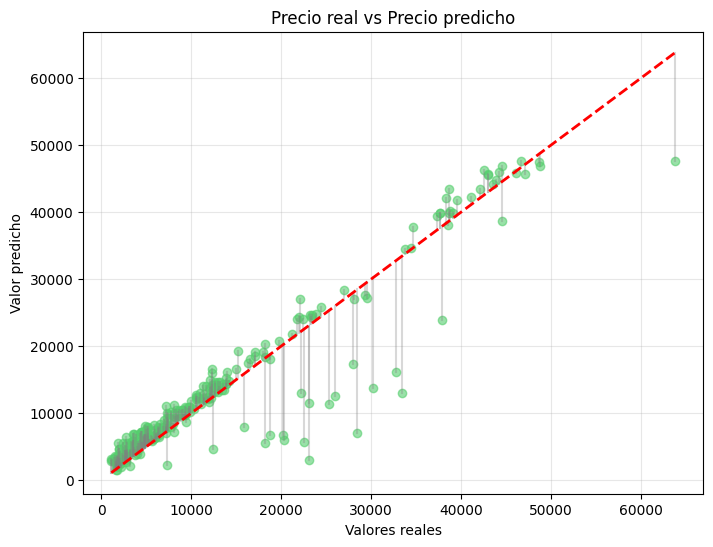

In [47]:
#Gráficamos -Predicciones vs Valores Reales-
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="#56ce6e")

for real, pred in zip(y_test, y_pred):
    plt.plot([real, real], [real, pred], color="gray", alpha=0.3)
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, "r--", linewidth=2)  # línea roja de predicción perfecta

plt.xlabel("Valores reales")
plt.ylabel("Valor predicho")
plt.title("Precio real vs Precio predicho")
plt.grid(alpha=0.3)
plt.show()

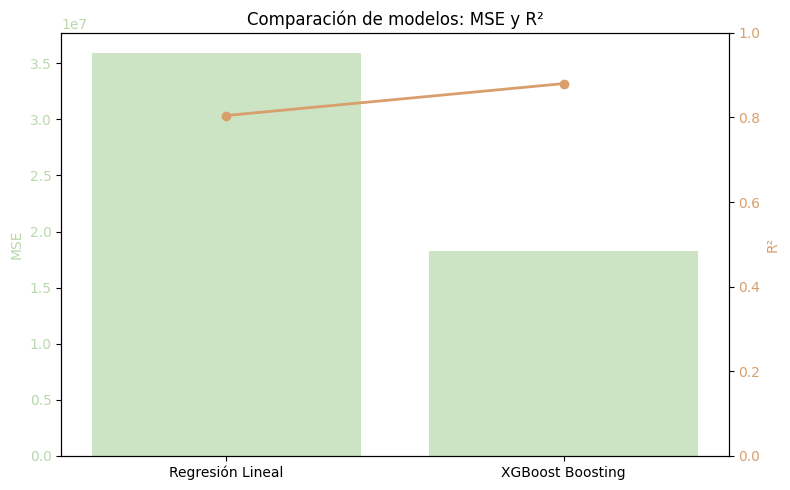

In [52]:
#Comparación de los datos del modelo de regresión lineal vs XGBoost
modelos = ["Regresión Lineal", "XGBoost Boosting"]
mse = [35921882.08, 18230715.83]
r2 = [0.8045, 0.88]

fig, ax1 = plt.subplots(figsize=(8,5))

ax1.bar(modelos, mse, color="#b9d9ac", alpha=0.7, label="MSE")
ax1.set_ylabel("MSE", color="#b9d9ac")
ax1.tick_params(axis='y', labelcolor="#b9d9ac")
ax1.set_title("Comparación de modelos: MSE y R²")

ax2 = ax1.twinx()
ax2.plot(modelos, r2, color="#d89f6d", marker="o", linewidth=2, label="R²")
ax2.set_ylabel("R²", color="#d89f6d")
ax2.tick_params(axis='y', labelcolor="#d89f6d")
ax2.set_ylim(0, 1)

fig.tight_layout()
plt.show()


In [48]:
#Guardamos el modelo entrenado
joblib.dump(model, "../models/boosting_model.pkl")
print("Modelo guardado en ../models/boosting_model.pkl")

Modelo guardado en ../models/boosting_model.pkl


#Conclusiones
Una vez que utilizamos XGBoost en el modelo anteriormente utilizado (Regresión lineal) se puede ver claramente que ha mejorado.

- MSE es más bajo en el modelo con boosting, por lo que sus predicciónes son más cercanas a los valores reales (menos error cuadrático promedio)
- R² es más alto en el modelo con boosting, pasando de un 80% a un 88%

Con esto confirmamos que el usar XGBoost captó de mejor de mejor manera las relaciones entre las variables que el modelo anterior (regresión lineal)
